# Projeto Final - Machine Learning
- Luca Melão
- Matheus Kwon

## 1. Contexto

Diante de uma maior relevância da economia compartilhada e crescimento de empresas situadas nesse ambiente, a locação de imóveis foi se tornando mais inovadora ao longo dos últimos ano. O Airbnb é um exemplo de empresa situada nesse escopo de serviço, que promove um serviço de locação de fácil acesso e rápido, muitas vezes próximo do período desejado. Assim, buscamos compreender como variados fatores impactam na formação de preços das locações e também nos reviews das mesmas, sendo esse o objetivo de análise do projeto.

O dataset escolhido tem como fonte as informações abertas do Airbnb no estado de Nova Iorque, e foi extraída diretamente do Kaggle. Desde 2008, hóspedes e anfitriões usam o Airbnb para viajar de uma forma mais exclusiva e personalizada. Como parte da iniciativa Airbnb Inside, este conjunto de dados descreve a atividade de anúncios de homestays na cidade de Nova York. Contendo informações relativas à localização, preço por noite, reviews, disponibilidade, ano de construção, etc.




Identificamos 2 grandes alavancas de valor que a companhia consegue endereçar a partir das análises que serão feitas aqui:


### A) Marketing

Utilizando-se do estudo, a plataforma consegue identificar os principais pontos de atração para os consumidores, entendendo quais são as características dos imóveis com maior taxa de sucesso. Desse modo, é possível definir as melhores práticas para serem utilizadas e a partir destes drivers e também criar novas features para seus usuários - como novos filtros de número de reviews, regras da casa, ano de construção - para que os consumidores tenham melhores experiências na hora de alugar uma residência e aumentem a taxa de sucesso (realizar o aluguel do imóvel) de um usuário que faz uso da plataforma.

### B) Relação com clientes

Ademais, a segunda alavanca de valor que o Airbnb pode ter é na melhora da sua relação com os usuários que oferecem seus imóveis para locação. A plataforma pode apresentar novas dicas e formatos de exposição da residência, para que os principais usuários tenham uma maior taxa de ocupação e atraiam mais clientes. Desse modo, o *Airbnb* consegue elevar suas vendas e melhorar a relação com os seus principais locatários.

O conjunto de dados se divide em diversas informações relevantes para análise exploratória. Com relação ao imóvel, as variáveis apresentadas são o tipo do domicílio, bairro de localização, ano de construção, política de cancelamento; já em relação as variáveis numéricas, destacam-se o preço da locação, a taxa de serviço, o número mínimo de noites permitidas, número de avaliações, nota de avaliação e disponibilidade durante o ano.


As informações de cada variável da base de dados pode ser encontrada abaixo:

- `id`: Corresponde a **identificação** do imóvel;



- `NAME`: Corresponde ao **nome de identificação** do imóvel;



- `host id`: Corresponde ao **número de identificação** do anfitrião;



- `host_identity_verified`: Indica se a identidade do anfitrião foi **confirmada**, é representada por uma **variável categórica**:
        - 1, se confirmada
        - 0, se não confirmada



- `host name`: **Nome** do anfitrião;



- `neighbourhood group`: **Bairro** em que o imóvel está localizado:
      - `T.Brooklyn` se na região do Brooklyn;
      - `T.Manhattan` se na região de Manhattan;
      - `T.Queens` se na região do Queens;
      - `T.Bronx` se na região do Bronx;
      - `T.Staten Island` se na região da Ilha de Staten.




- `neighbourhood`: **Vizinhança** em que o imóvel se localiza;



- `lat`: **Latitude** da localização do imóvel;



- `long`: **Longitude** da localização do imóvel;



- `room_type`: **Tipo de quarto ou imóvel** que será alugado:
      - `room_type`: Tipo de quarto ou imóvel que será alugado
      - `T.Hotel room` se em hotel;
      - `T.Private room` se quarto privativo;
      - `T.Shared room` se quarto compartilhado.


- `country`: **País** em que o imóvel se encontra;



- `country code`: **Código de país** em que o imóvel se encontra;



- `instant_bookable`: Indica se é possível locar o imóvel **instantaneamente**:
         
        - 1, se sim
        - 0, se não for possível
        
- `cancellation_policy`: Indica a **política de cancelamento** da locação do imóvel;



- `service fee`: **Taxa de serviço** que é cobrado na locação do imóvel;



- `Construction year`: **Ano de construção** do imóvel;



- `price`: **Preço** de locação do imóvel;



- `minimum nights`: Estadia mínima que é solicitada para locação (em dias);



- `number of reviews`: **Número de avaliações** do imóvel;



- `last review`: **Data da última avaliação** do imóvel;



- `reviews per month`: **Número de avaliações** média por mês;



- `review rate number`: **Nota** de avaliação;



- `calculated host listings count`: **Número de listagens** do anfitrião;



- `avaliability 365`: **Disponibilidade** do imóvel durante o ano (em dias);



- `house_rules`: **Regras** do imóvel.


- `licence`: Não há informação o suficiente sobre.

----

# 1. Imports necessários

## 1.1. Importando o Dataset

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns   
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## 1.2. Importando o Dataset

In [5]:
filepath = 'data/'
filename = 'AB_NYC_2019.csv'

if filename in  os.listdir(filepath):
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que você não baixou o arquivo na pasta "./data" ?')

Encontrei o arquivo AB_NYC_2019.csv, tudo certo para prosseguir!


In [6]:
# Lendo o arquivo
db_original = pd.read_csv(filepath + filename)

# Trabalharemos em uma cópia do dataset
db = db_original.copy()

----

# 2. Informações Gerais

In [5]:
size = db.shape
linhas = size[0]
colunas = size[1]
print(f'Linhas: {linhas}')
print(f'Colunas: {colunas}')

Linhas: 48895
Colunas: 16


In [6]:
display(db.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


----

# 3. Tratamento dos dados

## 3.1. Conversão dos dtypes
Algumas das features, e também o nosso target, estão no formato object, devemos então realizar a conversão para float, string ou demais dtypes.

In [7]:
# Convert price
db['price'] = db['price'].astype(str).apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

# Convert service fee
# db['service fee'] = db['service fee'].astype(str).apply(lambda x: x.replace('nan', '0').replace('$', '')).astype('int')

# Convert country
# db['country'] = db['country'].astype(str)

# Convert NAME
db['name'] = db['name'].astype(str)

# Convert country code
# db['country code'] = db['country code'].astype(str)

# Convert host_identity_verified
# db['host_identity_verified'] = db.host_identity_verified.map(dict(verified=1, unconfirmed=0))

# Convert host name
db['host_name'] = db['host_name'].astype(str)

# Convert neighbourhood group
db['neighbourhood_group'] = db['neighbourhood_group'].astype(str)

# Convert neighbourhood 
db['neighbourhood'] = db['neighbourhood'].astype(str)

# Convert instant bookable
# db['instant_bookable'] = pd.to_numeric(db['instant_bookable'], errors='coerce')

# Convert cancelation policy
# db['cancellation_policy'] = db['cancellation_policy'].astype(str)

# Convert room type
db['room_type'] = db['room_type'].astype(str)

# Convert the date from the last review
db['last_review'] = pd.to_datetime(db['last_review'])

In [21]:
# Validando a conversão definindo o nosso target
target = db['price']
target.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## 3.2. Eliminando duplicatas

In [8]:
db.drop_duplicates(keep='first', inplace=True)

## 3.3. Lidando com valores NaN

Com os dados no formato desejado, podemos começar a tratá-los.

In [23]:
# Quantos nulos tenho em cada coluna?
dadosnulls = db.isnull().sum()
dadosnulls[dadosnulls.values > 0]

last_review          10052
reviews_per_month    10052
dtype: int64

In [10]:
# Percentualmente
display(round((dadosnulls[dadosnulls.values>0]/linhas)*100, 2).sort_values(ascending=0))

license                           99.47
house_rules                       50.53
last review                       15.43
reviews per month                 15.42
availability 365                   0.44
minimum nights                     0.39
review rate number                 0.31
calculated host listings count     0.31
host_identity_verified             0.28
price                              0.24
Construction year                  0.21
number of reviews                  0.18
instant_bookable                   0.10
lat                                0.01
long                               0.01
dtype: float64

In [11]:
# Todos sao do eua, entao não faz sentido analisar country e country code
db.drop(['country', 'country code'], axis = 1, inplace=True)

# Eliminando as colunas com mais de 50% dos valores nulos, ou colunas que não agregam valor para a análise
db.drop(['id', 'host id', 'host name', 'last review','license','house_rules'], axis = 1, inplace=True)

In [12]:
# Nas colunas quantitativas devemos preencher os nan com as medianas
quant_features = ['Construction year', 'price', 'service fee', 'minimum nights',
                  'number of reviews', 'review rate number', 'availability 365', 'calculated host listings count'  ]

for feature in quant_features:
    db[feature].fillna(value = db[feature].median(), inplace = True)

In [13]:
# Nas colunas qualitativas devemos preencher caso a caso
db.fillna({'reviews_per_month':0}, inplace=True)

db['neighbourhood group'].replace(['manhatan','brookln'],['Manhattan','Brooklyn'],inplace=True)
db['neighbourhood group'].dropna(inplace=True)


# Remove neighbourhood group onde for nulo
db.dropna(subset=['neighbourhood group'], inplace=True)

# Tirando linhas onde a variável "neighbourhood group" possui valores nan 
db['neighbourhood group']=db['neighbourhood group'].dropna()

#Tirando linhas onde a variável que indica se a identidade do anfitrião verificada possui valores nan
db['host_identity_verified']=db['host_identity_verified'].dropna()

#Tirando linhas onde a variável "instant bookable" possui valores nan
db['instant_bookable']=db['instant_bookable'].dropna()

db.fillna({'reviews_per_month':0}, inplace=True)



In [36]:
db = db[db['neighbourhood group'] != 'nan']
db['neighbourhood group'].value_counts()




Brooklyn         36545
Manhattan        34734
Queens           11487
Bronx             2474
Staten Island      870
Name: neighbourhood group, dtype: int64

## Outliers

<AxesSubplot:>

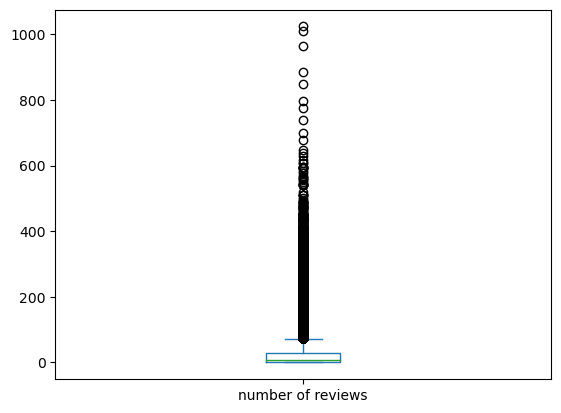

In [14]:
db['number of reviews'].plot.box()

<AxesSubplot:>

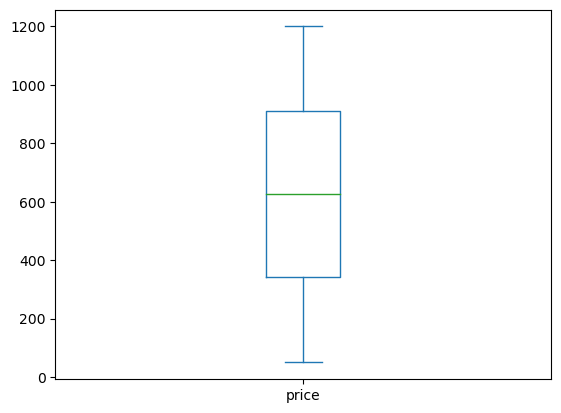

In [15]:
db['price'].plot.box()

<AxesSubplot:>

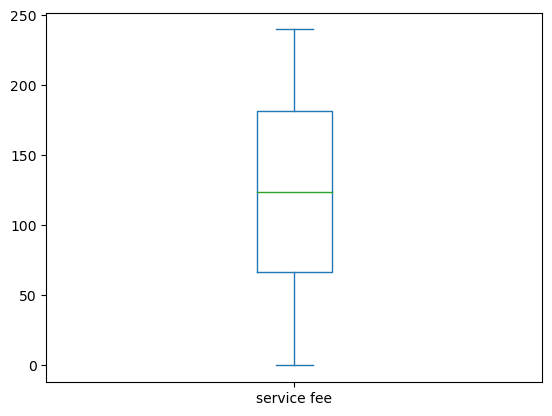

In [16]:
db['service fee'].plot.box()

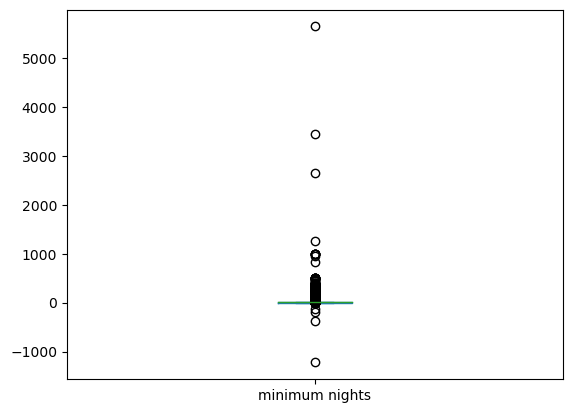

In [17]:
# Outlier
db['minimum nights'].plot.box()

db = db[(db['minimum nights'] > 0) & (db['minimum nights'] < 15)]

<AxesSubplot:>

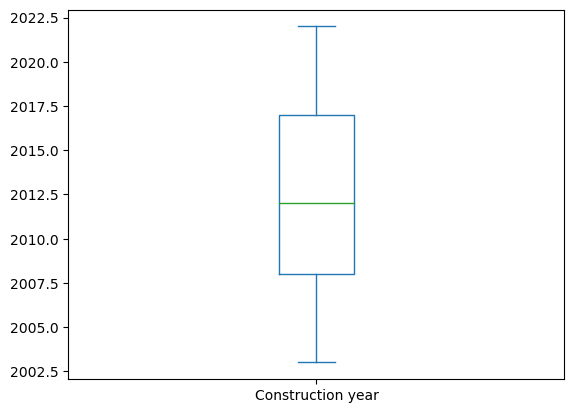

In [18]:
# Está adequado
db['Construction year'].plot.box()

<AxesSubplot:>

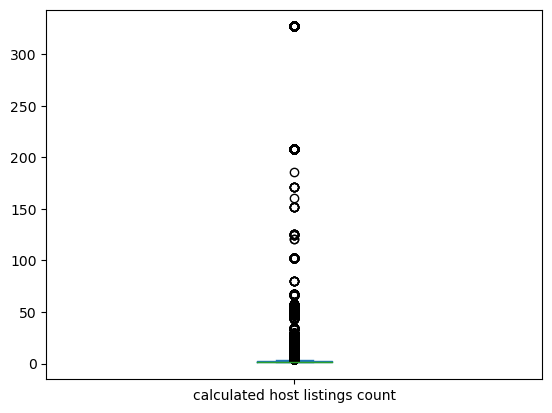

In [19]:
# O maior host tem 324 anúncios!
db["calculated host listings count"].plot.box()

In [20]:
# Base de dados final
display(db.head())

,NAME,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,0.0,Brooklyn,Kensington,40.64749,-73.97237,0.0,strict,Private room,2020.0,966.0,193,10.0,9.0,0.21,4.0,6.0,286.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Manhattan,Harlem,40.80902,-73.94190,1.0,flexible,Private room,2005.0,620.0,124,3.0,0.0,NaN,5.0,1.0,352.0
4,Entire Apt: Spacious Studio/Loft by central park,1.0,Manhattan,East Harlem,40.79851,-73.94399,0.0,moderate,Entire home/apt,2009.0,204.0,41,10.0,9.0,0.10,3.0,1.0,289.0
5,Large Cozy 1 BR Apartment In Midtown East,1.0,Manhattan,Murray Hill,40.74767,-73.97500,1.0,flexible,Entire home/apt,2013.0,577.0,115,3.0,74.0,0.59,3.0,1.0,374.0
8,Large Furnished Room Near B'way,1.0,Manhattan,Hell's Kitchen,40.76489,-73.98493,1.0,strict,Private room,2005.0,1018.0,204,2.0,430.0,3.47,3.0,1.0,180.0


----

# 4. Análise Exploratória

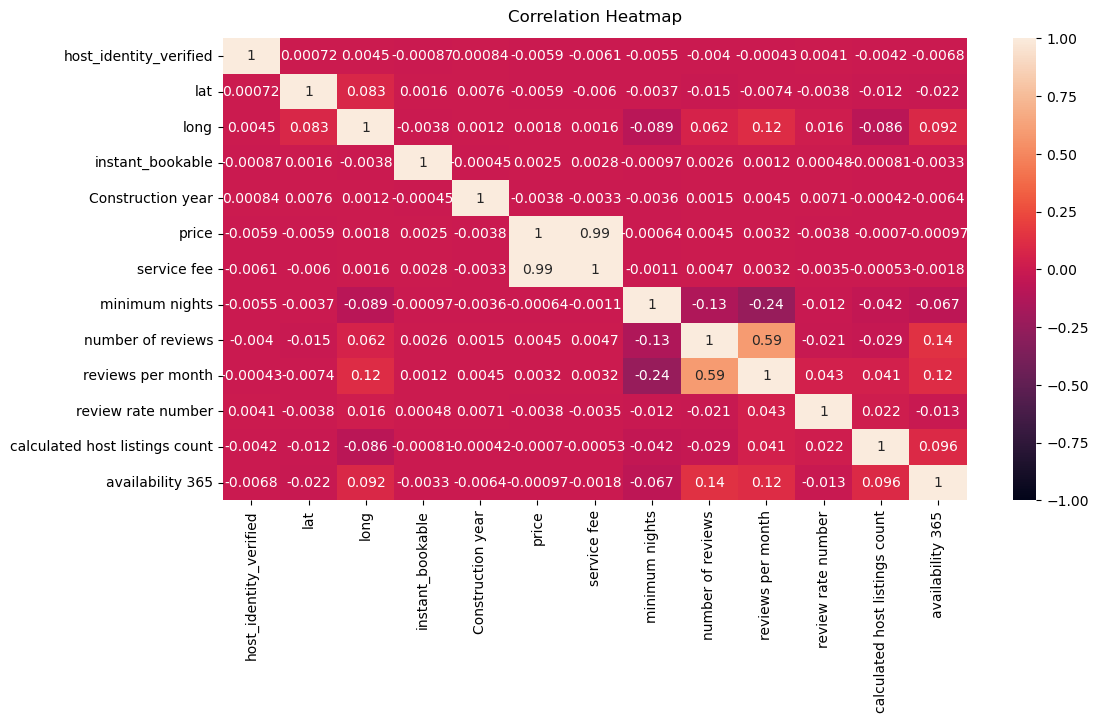

In [21]:
plt.figure(figsize=(12, 6))

# heatmap = sns.heatmap(db.corr(), vmin=-1, vmax=1, annot=True)

# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

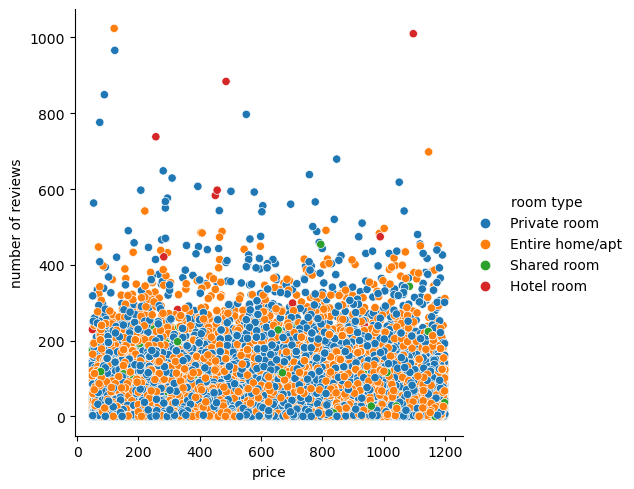

In [22]:
sns.relplot(data=db, kind='scatter', x='price', y='number of reviews', hue='room type');

In [23]:
top_10 = db.nlargest(10,'number of reviews')
mean = top_10.price.mean()
print('Avg price per night: {}'.format(mean))

top_10.head(10)

Avg price per night: 479.3


,NAME,host_identity_verified,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
52488,Sonder Battery Park | Studio Apartment,1.0,Manhattan,Financial District,40.70617,-74.01486,0.0,strict,Entire home/apt,2019.0,121.0,24,2.0,1024.0,57.31,4.0,54.0,365.0
62244,City King,1.0,Manhattan,SoHo,40.72440,-74.00794,0.0,moderate,Hotel room,2017.0,1097.0,219,1.0,1010.0,33.08,4.0,11.0,80.0
49799,Amazing Micro Unit W/ communal rooftop and kit...,1.0,Manhattan,East Village,40.72380,-73.99038,1.0,strict,Private room,2011.0,123.0,25,1.0,966.0,34.46,2.0,4.0,355.0
53078,Enjoy great views of the City!,0.0,Manhattan,Theater District,40.75876,-73.98846,0.0,flexible,Hotel room,2004.0,486.0,97,1.0,884.0,25.23,3.0,9.0,360.0
49653,Come catch a Broadway Show & stay in Times Square,1.0,Manhattan,Theater District,40.76360,-73.98473,0.0,flexible,Private room,2008.0,89.0,18,1.0,849.0,90.00,4.0,12.0,361.0
49827,Hudson River View King Bed at Higher Floor,0.0,Manhattan,Theater District,40.76190,-73.98454,0.0,moderate,Private room,2004.0,552.0,110,1.0,797.0,84.49,4.0,12.0,361.0
49605,Beautiful Standard Full Room at The Ridge,0.0,Manhattan,Lower East Side,40.72259,-73.98841,0.0,strict,Private room,2018.0,74.0,15,1.0,776.0,30.51,4.0,4.0,338.0
57532,King Room City,1.0,Manhattan,Midtown,40.74623,-73.98499,1.0,strict,Hotel room,2012.0,257.0,51,1.0,738.0,24.49,3.0,11.0,118.0
50780,THE PRIVACY DEN ~ 5 MINUTES TO JFK,0.0,Queens,Jamaica,40.66946,-73.76679,1.0,moderate,Entire home/apt,2005.0,1147.0,229,1.0,698.0,10.55,5.0,1.0,74.0
54308,Entire New Apartment in Park Slope / Gowanus,0.0,Brooklyn,Gowanus,40.66714,-73.99411,1.0,moderate,Private room,2008.0,847.0,169,1.0,679.0,9.51,2.0,1.0,65.0


## Análise de palavras chave nos anúncios 

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure

def word_cloud(words):
    # Create stopword list:
    stopwords = set(STOPWORDS)

    print("There are {} words in the combination of all review".format(len(words)))

    # Start with one review:
    text = " ".join(review for review in words)
    
    # Add custom word exlusions
    stopwords.update(["guidelines", "implemented", "access", "Average", "near","room", 'one', "Location", "Best",'Apt', 'stop', 'Full', 'NY','Gem', 'Chic'])

    # Create and generate a word cloud image:
    wordcloud = WordCloud(width = 1200, height = 800, background_color ='white', collocations=False, stopwords=stopwords).generate_from_text(text)

    # Display the generated image:
    figure(figsize=(8, 6), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

There are 48895 words in the combination of all review


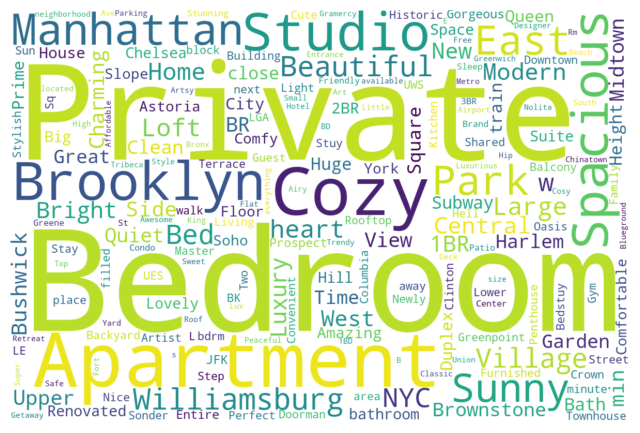

In [10]:
word_cloud(db.name)

There are 86110 words in the combination of all review


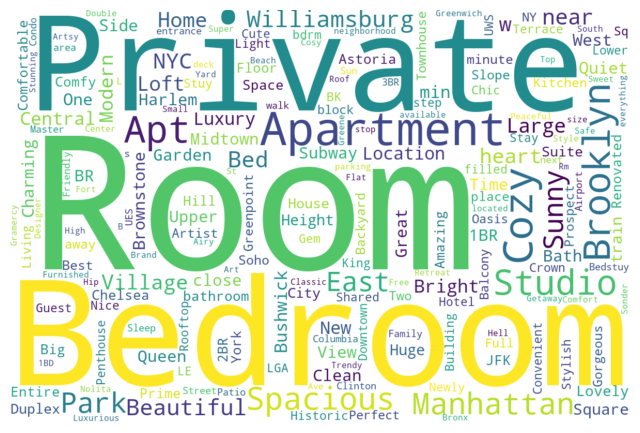

In [43]:
word_cloud(db.NAME)

## Regressão inicial

In [25]:
# Features
X = db[['number of reviews', 'review rate number', 'minimum nights', 'availability 365', 'calculated host listings count', 'Construction year']]

# Target
Y = db['price']

# Randomizador
RANDOM_SEED = 42

# Temos também o split de validação 
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=RANDOM_SEED)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.25,
                                                  random_state=RANDOM_SEED)

In [26]:
# Fit do modelo
import statsmodels.api as sm
model = sm.OLS(Y, X).fit()
# Sumário
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.781
Method:                 Least Squares   F-statistic:                          5.133e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        00:08:12   Log-Likelihood:                     -6.2197e+05
No. Observations:               86135   AIC:                                  1.244e+06
Df Residuals:                   86129   BIC:                                  1.244e+06
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

a = model.fit(X_train, y_train)
y_pred = model.predict(X_val)

RMSE = 100 * (10**np.sqrt(mean_squared_error(y_val, y_pred)) - 1)
print(f'erro = {round(RMSE, 2)} %')

erro = inf %


/var/folders/18/8l06zz3s5_bdw3brnw4jt_bc0000gn/T/ipykernel_7884/2039064273.py:8: RuntimeWarning: overflow encountered in double_scalars
  RMSE = 100 * (10**np.sqrt(mean_squared_error(y_val, y_pred)) - 1)


# Ideias de análise

- 1. Explorar o impacto da service fee (percentualmente) na preferencia ou precificacao dos anuncios.
- 2. Estudo por regiao, localizacao X bairros marginalizados X preco
- 3. Análise do modo como o nome do anúncio é feito
- 4. Pelo 'host id' podemos ver quais proprietarios possuem mais listings no airbnb e como fazem uso disso ao seu favor.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

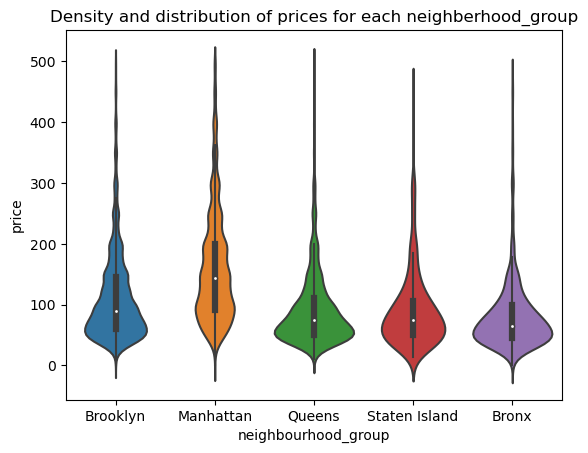

In [12]:
sub_6 = db[db.price < 500]
viz_2=sns.violinplot(data=sub_6, x="neighbourhood_group", y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

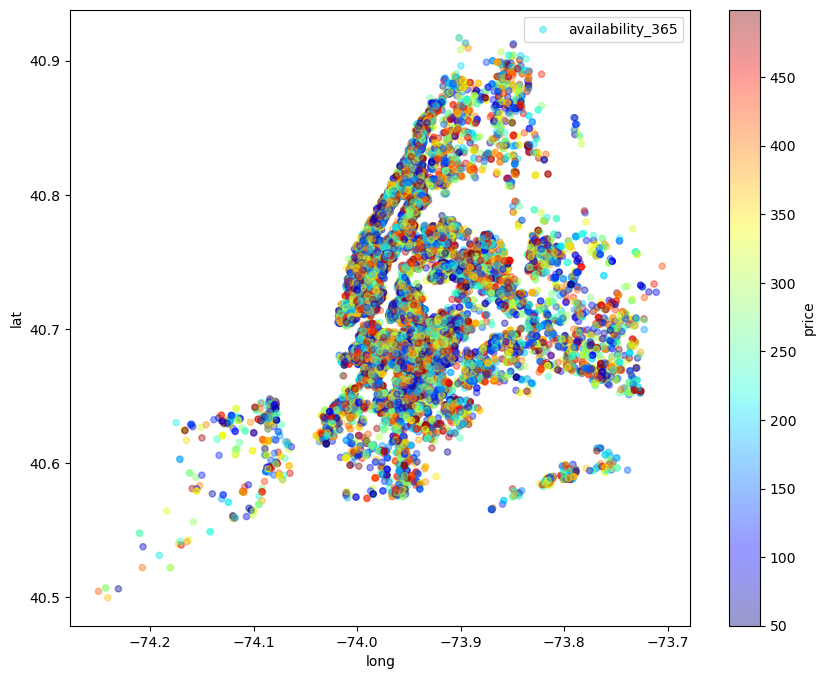

In [49]:
sub_6 = db[db.price < 500]
viz_4=sub_6.plot(kind='scatter', x='long', y='lat', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

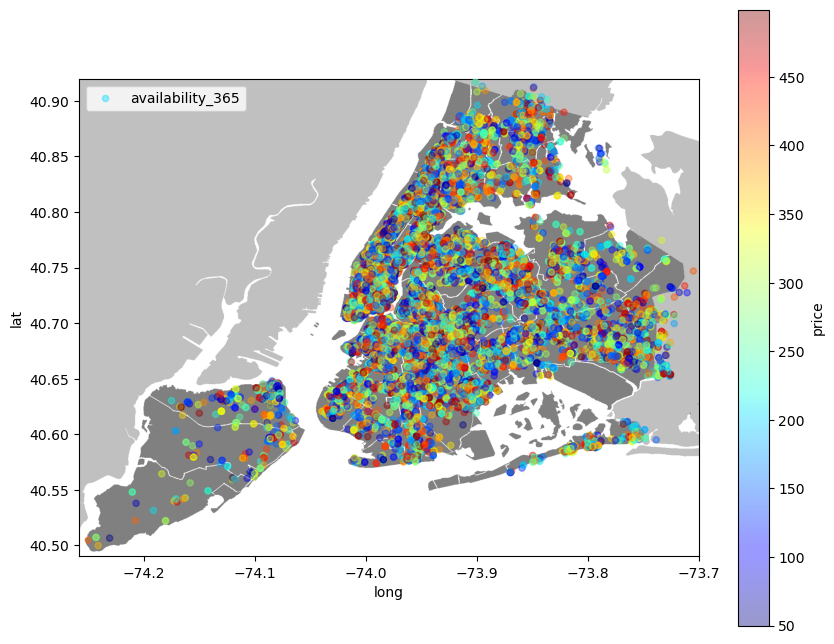

In [51]:
plt.figure(figsize=(10,8))


nyc_img=plt.imread('Neighbourhoods_New_York_City_Map.PNG')
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='long', y='lat', label='availability_365', c='price', ax=ax,
              cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)


plt.legend()
plt.show()

## Referências

-  https://www.kaggle.com/code/dgomonov/data-exploration-on-nyc-airbnb/notebook
-  https://www.datacamp.com/tutorial/wordcloud-python